#Simple Exponential TSA

In [1]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics

In [15]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_Raw.csv to Cleaned_Raw.csv


Load the dataset

In [115]:
df=pd.read_csv('Cleaned_Raw.csv',parse_dates=['ESDT'])

Check the datatypes

In [116]:
df.info() # date format 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ESDT      4644 non-null   datetime64[ns]
 1   PC        4644 non-null   float64       
 2   VolOfEff  4644 non-null   float64       
 3   SVI       4644 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 145.2 KB


Check if there are missing values

In [117]:
df.isnull().sum()

ESDT        0
PC          0
VolOfEff    0
SVI         0
dtype: int64

# START OF TSA Power Consumption |||||||||||||||||||||||||

Preparing the dates and the Power Consumption column for TSA

In [118]:
esdt_pc=df[['ESDT','PC']]
esdt_pc

,ESDT,PC
0,2022-09-18,4432.659180
1,2022-09-17,4430.513184
2,2022-09-16,4428.309082
3,2022-09-15,4426.136230
4,2022-09-14,4424.067871
...,...,...
4639,2019-05-23,0.000000
4640,2019-05-23,0.000000
4641,2019-05-22,0.000000
4642,2019-05-21,0.000000


Pivot the Power Consumption via sum per day

In [119]:
esdt_pc=esdt_pc.groupby('ESDT').sum()

Pivot the Power Consumption via sum per month

In [120]:
#daily> monthyly 
# how to aggregate the date we take the sum or the mean?
esdt_pc=esdt_pc.resample(rule='MS').sum() # rule & aggregation parameter

Show the plot in months

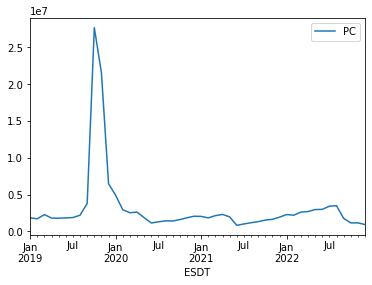

In [121]:
esdt_pc.plot()

# Split for Training and Testing

In [122]:
# check the length of the pivot
len(esdt_pc)

48

In [123]:
# split it to training and testing
train=esdt_pc[:39] #80%
test=esdt_pc[39:] #20%

In [124]:
len(train)

39

In [125]:
len(test)

9

# Train the model

In [126]:
semodel = SimpleExpSmoothing(train, initialization_method="estimated").fit()
semodel_predict= semodel.forecast(9)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [127]:
# show model summary
semodel.summary()

Dep. Variable:,PC,No. Observations:,39
Model:,SimpleExpSmoothing,SSE,876172398905440.625
Optimized:,True,AIC,1202.978
Trend:,None,BIC,1206.305
Seasonal:,None,AICC,1204.154
Seasonal Periods:,None,Date:,"Sat, 26 Nov 2022"
Box-Cox:,False,Time:,13:40:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,-3.5394e+06,l.0,True


In [128]:
# show the predicted values
semodel_predict

2022-04-01    2.624376e+06
2022-05-01    2.624376e+06
2022-06-01    2.624376e+06
2022-07-01    2.624376e+06
2022-08-01    2.624376e+06
2022-09-01    2.624376e+06
2022-10-01    2.624376e+06
2022-11-01    2.624376e+06
2022-12-01    2.624376e+06
Freq: MS, dtype: float64

Visualize the Model

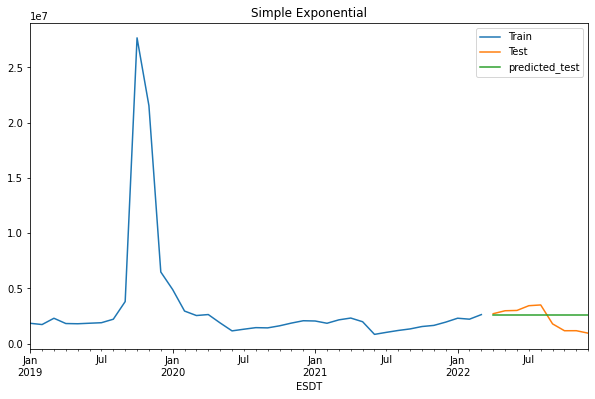

In [129]:
train['PC'].plot(legend=True, label='Train', figsize=(10,6))
test['PC'].plot(legend=True, label='Test')

semodel_predict.plot(legend=True, label='predicted_test', title='Simple Exponential')

In [130]:
# This is a function definition for the evaluation of the model
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [131]:
# result of the model evaluation
timeseries_evaluation_metrics_func(test.PC, semodel_predict)

Evaluation metric results:-
MSE is : 1051136314494.3315
MAE is : 881084.6498948082
RMSE is : 1025249.3913650139
MAPE is : 61.124759831220324
R2 is : -0.11220322570408392



# Final Model Power Consumption

In [132]:
fsemodel = SimpleExpSmoothing(esdt_pc.PC, initialization_method="estimated").fit()
fsemodel_predict= fsemodel.forecast(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [133]:
fsemodel_predict


2023-01-01    946163.04726
2023-02-01    946163.04726
2023-03-01    946163.04726
2023-04-01    946163.04726
2023-05-01    946163.04726
2023-06-01    946163.04726
2023-07-01    946163.04726
2023-08-01    946163.04726
2023-09-01    946163.04726
2023-10-01    946163.04726
Freq: MS, dtype: float64

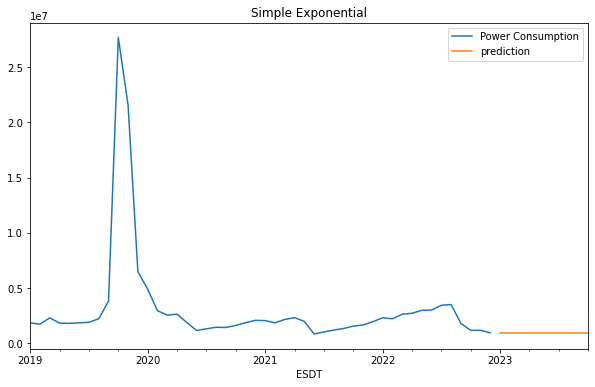

In [134]:
esdt_pc['PC'].plot(legend=True, label='Power Consumption', figsize=(10,6))
fsemodel_predict.plot(legend=True, label='prediction', title='Simple Exponential')

In [ ]:
#end

#START of TSA Volume of Eff |||||||||||||||||||||||||||||||||||||||||||||||||||

In [135]:
esdt_vol=df[['ESDT','VolOfEff']]
esdt_vol

,ESDT,VolOfEff
0,2022-09-18,312.05
1,2022-09-17,312.05
2,2022-09-16,232.31
3,2022-09-15,305.74
4,2022-09-14,297.61
...,...,...
4639,2019-05-23,0.00
4640,2019-05-23,0.00
4641,2019-05-22,0.00
4642,2019-05-21,0.00


In [136]:
esdt_vol=esdt_vol.groupby('ESDT').sum()

In [137]:
#daily> monthyly 
# how to aggregate the date we take the sum or the mean?
esdt_vol=esdt_vol.resample(rule='MS').sum() # rule & aggregation parameter

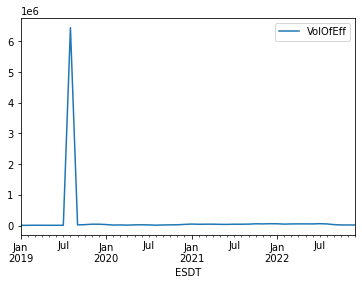

In [138]:
esdt_vol.plot()

In [139]:
len(esdt_vol)

48

In [140]:
# split
train=esdt_vol[:39] #80%
test=esdt_vol[39:] #20%

In [141]:
semodel = SimpleExpSmoothing(train, initialization_method="estimated").fit()
semodel_predict= semodel.forecast(9)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [142]:
semodel.summary()

Dep. Variable:,VolOfEff,No. Observations:,39
Model:,SimpleExpSmoothing,SSE,46007028862186.094
Optimized:,True,AIC,1088.054
Trend:,None,BIC,1091.381
Seasonal:,None,AICC,1089.230
Seasonal Periods:,None,Date:,"Sat, 26 Nov 2022"
Box-Cox:,False,Time:,13:41:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0970930,alpha,True
initial_level,-4.2831e+05,l.0,True


In [143]:
semodel_predict

2022-04-01    60338.512277
2022-05-01    60338.512277
2022-06-01    60338.512277
2022-07-01    60338.512277
2022-08-01    60338.512277
2022-09-01    60338.512277
2022-10-01    60338.512277
2022-11-01    60338.512277
2022-12-01    60338.512277
Freq: MS, dtype: float64

## Visualization of Training and Testing with Forcast

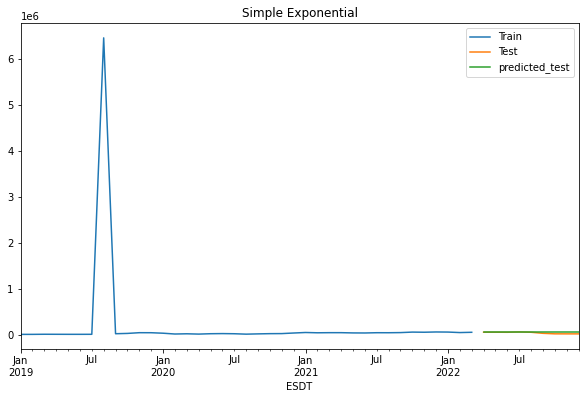

In [144]:
train['VolOfEff'].plot(legend=True, label='Train', figsize=(10,6))
test['VolOfEff'].plot(legend=True, label='Test')

semodel_predict.plot(legend=True, label='predicted_test', title='Simple Exponential')

In [145]:
# check the evaluation
timeseries_evaluation_metrics_func(test.VolOfEff, semodel_predict)

Evaluation metric results:-
MSE is : 756659484.9662118
MAE is : 21589.668943983128
RMSE is : 27507.444173645283
MAPE is : 102.16272429316015
R2 is : -1.604270300431696



# Final Model Vol. of Eff.

In [146]:
fsemodel = SimpleExpSmoothing(esdt_vol.VolOfEff, initialization_method="estimated").fit()
fsemodel_predict= fsemodel.forecast(9)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [147]:
fsemodel_predict

2023-01-01    44949.120301
2023-02-01    44949.120301
2023-03-01    44949.120301
2023-04-01    44949.120301
2023-05-01    44949.120301
2023-06-01    44949.120301
2023-07-01    44949.120301
2023-08-01    44949.120301
2023-09-01    44949.120301
Freq: MS, dtype: float64

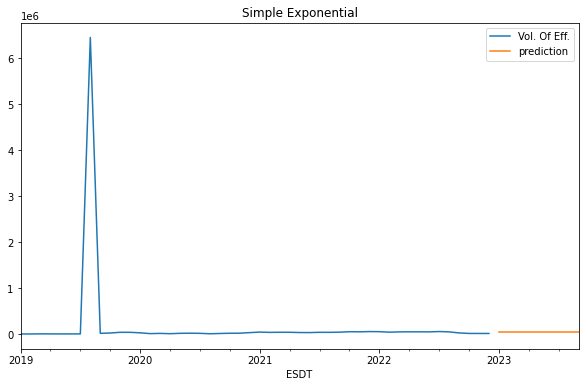

In [148]:
esdt_vol['VolOfEff'].plot(legend=True, label='Vol. Of Eff.', figsize=(10,6))
fsemodel_predict.plot(legend=True, label='prediction', title='Simple Exponential')

In [82]:
#end

# START OF TSA SVI |||||||||||||||||||||||||||||||||||||||||||||||||||

In [149]:
esdt_svi=df[['ESDT','SVI']]
esdt_svi

,ESDT,SVI
0,2022-09-18,110
1,2022-09-17,110
2,2022-09-16,130
3,2022-09-15,150
4,2022-09-14,150
...,...,...
4639,2019-05-23,0
4640,2019-05-23,0
4641,2019-05-22,0
4642,2019-05-21,0


In [150]:
esdt_svi=esdt_svi.groupby('ESDT').sum()

In [151]:
#daily> monthyly 
# how to aggregate the date we take the sum or the mean?
esdt_svi=esdt_svi.resample(rule='MS').sum() # rule & aggregation parameter

In [152]:
len(esdt_svi)

48

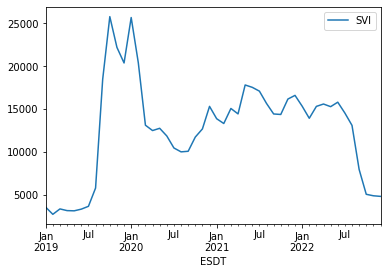

In [153]:
esdt_svi.plot()

In [159]:
# split
train=esdt_svi[:39] #80%
test=esdt_svi[39:] #20%

In [160]:
semodel = SimpleExpSmoothing(train, initialization_method="estimated").fit()
semodel_predict= semodel.forecast(9)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [161]:
semodel.summary()

Dep. Variable:,SVI,No. Observations:,39
Model:,SimpleExpSmoothing,SSE,441368947.885
Optimized:,True,AIC,637.431
Trend:,None,BIC,640.758
Seasonal:,None,AICC,638.608
Seasonal Periods:,None,Date:,"Sat, 26 Nov 2022"
Box-Cox:,False,Time:,13:42:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,-3535.7333,l.0,True


In [162]:
semodel_predict

2022-04-01    15303.085557
2022-05-01    15303.085557
2022-06-01    15303.085557
2022-07-01    15303.085557
2022-08-01    15303.085557
2022-09-01    15303.085557
2022-10-01    15303.085557
2022-11-01    15303.085557
2022-12-01    15303.085557
Freq: MS, dtype: float64

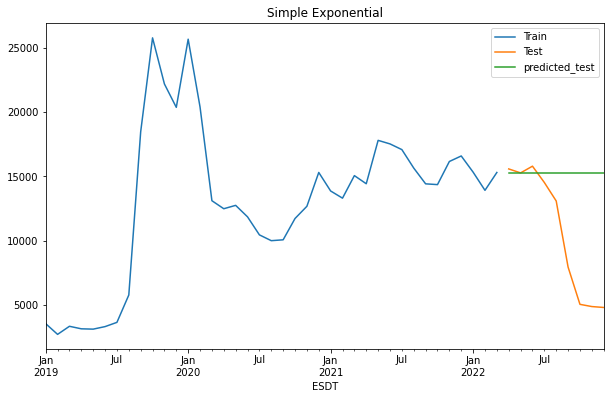

In [163]:
train['SVI'].plot(legend=True, label='Train', figsize=(10,6))
test['SVI'].plot(legend=True, label='Test')

semodel_predict.plot(legend=True, label='predicted_test', title='Simple Exponential')

In [164]:
# check the evaluation
timeseries_evaluation_metrics_func(test.SVI, semodel_predict)

Evaluation metric results:-
MSE is : 42706925.86527378
MAE is : 4704.936420611459
RMSE is : 6535.053623748911
MAPE is : 84.04226008246911
R2 is : -0.926238234309027



#Final Model SVI

In [165]:
fsemodel = SimpleExpSmoothing(esdt_svi.SVI, initialization_method="estimated").fit()
fsemodel_predict= fsemodel.forecast(9)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [166]:
fsemodel_predict

2023-01-01    4800.359666
2023-02-01    4800.359666
2023-03-01    4800.359666
2023-04-01    4800.359666
2023-05-01    4800.359666
2023-06-01    4800.359666
2023-07-01    4800.359666
2023-08-01    4800.359666
2023-09-01    4800.359666
Freq: MS, dtype: float64

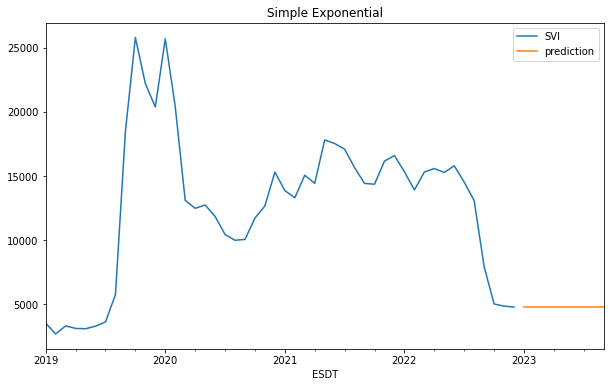

In [167]:
esdt_svi['SVI'].plot(legend=True, label='SVI', figsize=(10,6))
fsemodel_predict.plot(legend=True, label='prediction', title='Simple Exponential')